In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path
import re
import sqlite3

In [2]:
df = pd.read_excel('C:/Users/Admin/Desktop/ANALYSE/sql/data_billionaires.xlsx')

In [3]:
df.shape

(2614, 30)

In [4]:
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,NaN,...,founder,1956.0,1.830120e+11,NaN,NaN,NaN,http://www.jeraisy.com.sa/index.php/pages/rend...,NaN,NaN,NaN
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,relation,1960.0,1.030000e+11,NaN,inherited from father,NaN,NaN,NaN,NaN,NaN
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,founder,1968.0,1.577430e+11,NaN,NaN,NaN,http://www.arabianbusiness.com/arabian-busines...,NaN,NaN,NaN


In [5]:
df.isnull().sum()

year                          0
name                          0
rank                          0
citizenship                   0
countrycode                   0
networthusbillion             0
selfmade                     22
typeofwealth                 22
gender                       34
age                         185
industry                      1
IndustryAggregates            1
region                        0
north                         0
politicalconnection        2536
founder                       0
generationofinheritance       0
sector                       23
company                      38
companytype                  36
relationshiptocompany        46
foundingdate                 40
gdpcurrentus               1665
sourceofwealth              976
notes                      1424
notes2                     2417
source                       43
source_2                    471
source_3                   1839
source_4                   2591
dtype: int64

Since we have multiple columns with hundreds, if not thousands of NA values, it is necessary to determine how to replace this data.
Irrelevant columns include variables that include extraneous information like URLs.
Additionally, columns like 'political connection' and 'north' have very few relevant values and can be dropped entirely.

In [6]:
df = df.drop(columns=['notes', 'notes2','source',
       'source_2', 'source_3', 'source_4','politicalconnection','north'])

For data analysis it is important to retain as many row values as possible. That means that I want to avoid dropping entire columns unless I'm sure they're irrelevant to the overall analysis.
Therefore, I wanted to manually impute placeholder values to replace NAs and retain rows in the dataset.

In [7]:
df['age'].mean()

57.40386990531083

In [8]:
df['age'] = df['age'].fillna(57.4)

In [9]:
df[['selfmade', 'typeofwealth', 'gender','industry', 'IndustryAggregates', \
    'sector','company', 'companytype','relationshiptocompany','sourceofwealth']] = \
df[['selfmade', 'typeofwealth', 'gender','industry', 'IndustryAggregates','sector',\
    'company', 'companytype','relationshiptocompany','sourceofwealth']].fillna('no_info')

In [10]:
df[['foundingdate','gdpcurrentus']] = df[['foundingdate','gdpcurrentus']].fillna(0)
df[['foundingdate']] = df[['foundingdate']].astype(int)

In [11]:
df.rename(columns={'countrycode': 'country_code', 'networthusbillion': 'net_worth_US_billion', \
                   'typeofwealth': 'type_of_wealth', 'IndustryAggregates': 'industry_aggregates',  
                   'companytype': 'Company_type', 'relationshiptocompany': 'relationship_to_company',\
                   'foundingdate': 'founding_date','gdpcurrentus': 'GDP_current_US', 'sourceofwealth': 'source_of_wealth'},\
                    inplace=True)

In [12]:
df.head()

,year,name,rank,citizenship,country_code,net_worth_US_billion,selfmade,type_of_wealth,gender,age,...,region,founder,generationofinheritance,sector,company,Company_type,relationship_to_company,founding_date,GDP_current_US,source_of_wealth
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,North America,0,0,media,Univision,aquired,former chairman and CEO,1955,1.062180e+13,no_info
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,North America,0,0,media,Univision,aquired,former chairman and CEO,1955,0.000000e+00,"television, Univision"
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,57.4,...,Middle East/North Africa,1,0,industrial goods,Jeraisy Group,new,founder,1956,1.830120e+11,no_info
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,Middle East/North Africa,0,inherited from father,industrial goods,Al-Ghurair Group,new,relation,1960,1.030000e+11,no_info
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,Middle East/North Africa,1,0,construction,Rolaco Trading and Contracting Company,new,founder,1968,1.577430e+11,no_info


The Path library from Python allows me to create a SQL Lite database that I can connect to with Pandas' 'to_sql' method.

In [13]:
Path('df.db').touch()
billion_conn = sqlite3.connect('df.db')
billion_c = billion_conn.cursor()

In [14]:
df.to_sql('data', billion_conn, index=False, if_exists='replace')


2614

In [15]:
billion_dat_lst = pd.read_sql(''' SELECT * FROM data LIMIT 5 ''', billion_conn)
billion_dat_lst

,year,name,rank,citizenship,country_code,net_worth_US_billion,selfmade,type_of_wealth,gender,age,...,region,founder,generationofinheritance,sector,company,Company_type,relationship_to_company,founding_date,GDP_current_US,source_of_wealth
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,North America,0,0,media,Univision,aquired,former chairman and CEO,1955,1.062180e+13,no_info
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,North America,0,0,media,Univision,aquired,former chairman and CEO,1955,0.000000e+00,"television, Univision"
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,57.4,...,Middle East/North Africa,1,0,industrial goods,Jeraisy Group,new,founder,1956,1.830120e+11,no_info
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,Middle East/North Africa,0,inherited from father,industrial goods,Al-Ghurair Group,new,relation,1960,1.030000e+11,no_info
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,Middle East/North Africa,1,0,construction,Rolaco Trading and Contracting Company,new,founder,1968,1.577430e+11,no_info


In [16]:
df_2014 = df[df['year']== 2014]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

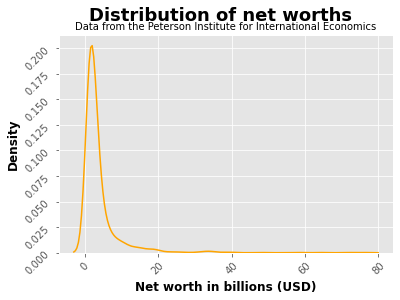

In [17]:
plt.style.use('ggplot')
plt.suptitle('Distribution of net worths', weight='bold', color = 'black').set_fontsize(18)
plt.title('Data from the Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.distplot(df_2014['net_worth_US_billion'], hist=False, kde=True, color = 'orange')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel('Net worth in billions (USD)', weight = 'bold', color = 'black')
plt.ylabel('Density', weight = 'bold', color = 'black')

The majority of net worth values in the dataset falls between 0 and 10 billion dollars.

In [18]:
top_ten = pd.read_sql(''' SELECT  name, net_worth_US_billion  FROM data
                     where  year = '2014' group by name order by net_worth_US_billion  desc limit 10  ''',billion_conn)

In [19]:
top_ten

,name,net_worth_US_billion
0,Bill Gates,76.0
1,Carlos Slim Helu,72.0
2,Amancio Ortega,64.0
3,Warren Buffett,58.2
4,Larry Ellison,48.0
5,David Koch,40.0
6,Charles Koch,40.0
7,Sheldon Adelson,38.0
8,Christy Walton,36.7
9,Jim Walton,34.7


In [20]:
top_ten.columns

Index(['name', 'net_worth_US_billion'], dtype='object')

However, for the world's richest people, the distribution extends from 15 to 100 billion dollars.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

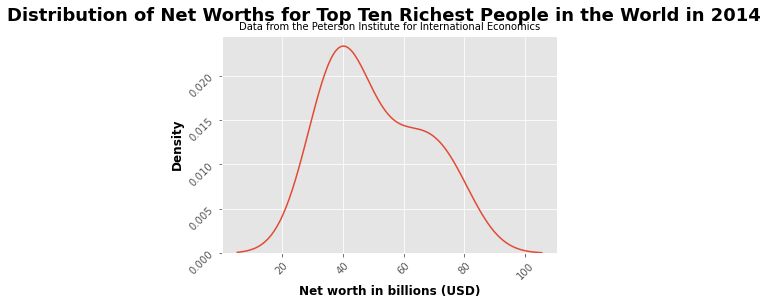

In [21]:
plt.suptitle('Distribution of Net Worths for Top Ten Richest People in the World in 2014', weight = 'bold', color = 'black').set_fontsize(18)
plt.title('Data from the Peterson Institute for International Economics', color = 'black').set_fontsize(10)
sns.distplot(top_ten['net_worth_US_billion'], hist=False, kde=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel('Net worth in billions (USD)', weight = 'bold', color = 'black')
plt.ylabel('Density', weight = 'bold', color = 'black')

At the date of this report Bill Gates was the richest individual in the world. Amazon CEO Jeff Bezos has since usurped his title.
The top 10 richest individuals in the world only includes one woman, Christy Walton, Walmart heiress.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bill Gates'),
  Text(1, 0, 'Carlos Slim Helu'),
  Text(2, 0, 'Amancio Ortega'),
  Text(3, 0, 'Warren Buffett'),
  Text(4, 0, 'Larry Ellison'),
  Text(5, 0, 'David Koch'),
  Text(6, 0, 'Charles Koch'),
  Text(7, 0, 'Sheldon Adelson'),
  Text(8, 0, 'Christy Walton'),
  Text(9, 0, 'Jim Walton')])

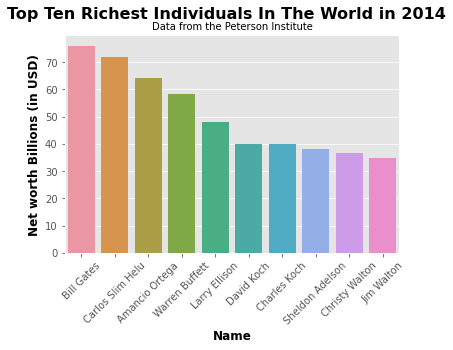

In [22]:

plt.suptitle('Top Ten Richest Individuals In The World in 2014', weight='bold', color='black').set_fontsize(16)
plt.title('Data from the Peterson Institute', color = 'black').set_fontsize(10)
sns.barplot('name', 'net_worth_US_billion', data = top_ten)
plt.xlabel('Name', weight = 'bold', color = 'black')
plt.ylabel('Net worth Billions (in USD)', weight = 'bold', color = 'black')
plt.xticks(rotation=45)

In [41]:
younger_billionaires_2014 = pd.read_sql(''' SELECT name, net_worth_US_billion, selfmade FROM data
                        WHERE age < 30  and year = '2014' group by name order by net_worth_US_billion
                        DESC ''', billion_conn)

In [42]:
younger_billionaires_2014

,name,net_worth_US_billion,selfmade
0,Mark Zuckerberg,28.5,self-made
1,Dustin Moskovitz,6.8,self-made
2,"Anton Kathrein, Jr.",1.4,inherited
3,Perenna Kei,1.3,inherited


In [43]:
younger_billionaires_2001 = pd.read_sql(''' SELECT name, net_worth_US_billion, selfmade FROM data
                        WHERE age < 30  and year = '2001' group by name order by net_worth_US_billion
                        DESC ''', billion_conn)

In [44]:
younger_billionaires_2001

,name,net_worth_US_billion,selfmade
0,Daniel Ziff,1.2,inherited


In [48]:
younger_billionaires_1996 = pd.read_sql(''' SELECT name, net_worth_US_billion, selfmade FROM data
                        WHERE age < 30  and year = '1996' group by name order by net_worth_US_billion
                        DESC limit 10 ''', billion_conn)

In [49]:
younger_billionaires_1996

,name,net_worth_US_billion,selfmade
0,Oeri Hoffman and Sacher,13.1,inherited
1,Walter Thomas and Raymond Kwok,11.2,inherited
2,Theo and Karl Albrecht,9.0,inherited
3,Hans and Gad Rausing,9.0,inherited
4,Haniel family,8.1,inherited
5,Tan Yu,7.0,self-made
6,Wonowidjojo family,6.7,inherited
7,Chung Ju-yung,5.9,self-made
8,Gerard Mulliez,5.7,self-made
9,Robert and Ten Fong Ng,5.2,inherited


From the analysis, it is evident that in 1996, the majority of billionaires under the age of 30 were inherited, and this number was much higher than in 2001 and 2014.

In [103]:
selfmade = ['inherited','self-made']

In [104]:
selfmade_billionaires= df[df['selfmade'].isin(selfmade)].groupby([ 'year','selfmade',])\
                      .agg({'name':'count'}).rename(columns= {'name':'quantity'}).reset_index()

In [105]:
import plotly.express as px
years = [1996, 2001, 2014]
fig = px.bar(selfmade_billionaires, x="year", y="quantity", color="selfmade", title="Self-made/Inhereted billionaires by years ")
fig.update_layout(xaxis={'tickvals': years})


fig.show()

In [78]:
df['age_group'] = pd.cut(df['age'], bins=3, labels=['before 30', '30-65', 'more than 65'])

In [115]:
age_group_selfmade_2014=df[(df['year'] ==2014)&(df['selfmade'].isin(selfmade))].groupby(['age_group','selfmade'])\
                   .agg({'name':'count'}).rename(columns= {'name':'quantity'}).reset_index()

In [117]:
import plotly.express as px
age_group = ['before 30', '30-65', 'more than 65']
fig = px.bar(age_group_selfmade_2014, x="age_group", y="quantity", color="selfmade",\
             title="Self-made/Inhereted billionaires by ages in 2014 ")
fig.update_layout(xaxis={'tickvals': age_group})


fig.show()

In [118]:
age_group_selfmade_2001=df[(df['year'] ==2001)&(df['selfmade'].isin(selfmade))].groupby(['age_group','selfmade'])\
                   .agg({'name':'count'}).rename(columns= {'name':'quantity'}).reset_index()

In [119]:
import plotly.express as px
age_group = ['before 30', '30-65', 'more than 65']
fig = px.bar(age_group_selfmade_2001, x="age_group", y="quantity", color="selfmade",\
             title="Self-made/Inhereted billionaires by ages in 2001 ")
fig.update_layout(xaxis={'tickvals': age_group})


fig.show()

In [120]:
age_group_selfmade_1996=df[(df['year'] ==1996)&(df['selfmade'].isin(selfmade))].groupby(['age_group','selfmade'])\
                   .agg({'name':'count'}).rename(columns= {'name':'quantity'}).reset_index()

In [121]:
import plotly.express as px
age_group = ['before 30', '30-65', 'more than 65']
fig = px.bar(age_group_selfmade_1996, x="age_group", y="quantity", color="selfmade",\
             title="Self-made/Inhereted billionaires by ages in 1996 ")
fig.update_layout(xaxis={'tickvals': age_group})


fig.show()

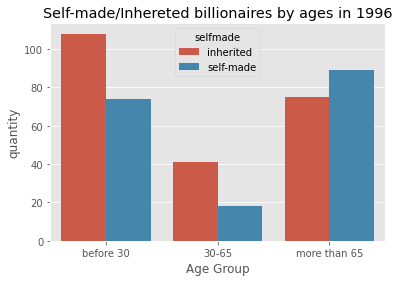

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# создаем фигуру и оси
fig, ax = plt.subplots()

# используем функцию barplot для создания графика
sns.barplot(x='age_group', y='quantity', hue='selfmade', data=age_group_selfmade_1996, ax=ax)

# задаем заголовок и подписи осей
ax.set_title('Self-made/Inhereted billionaires by ages in 1996')
ax.set_xlabel('Age Group')

# показываем график
plt.show()
